In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Wholesale customer Data and verifying whether all the columns are loaded correctly or not

In [2]:
wcd=pd.read_csv("Wholesale+Customers+Data.csv")
wcd.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
# Adding 'Total' column in the dataset to know total amount of all 6 varieties 
wcd["Total"]=wcd["Fresh"]+wcd["Milk"]+wcd["Grocery"]+wcd["Frozen"]+wcd["Detergents_Paper"]+wcd["Delicatessen"]
wcd.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


# Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [4]:
# Using Pivot table of Region vs Channel with Total values, for knowing the maximum and minimum spents Channel and region wise.
ws1=wcd.pivot_table(values='Total',index='Region',columns='Channel',aggfunc='sum')
ws1

Channel,Hotel,Retail
Region,,
Lisbon,1538342,848471
Oporto,719150,835938
Other,5742077,4935522


# There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [5]:
# Using Pivot Table to know the average spendings of all the 6 varietis Channel and Region wise instead of Total spending because the number of distributors in each channel is not same.
ws2=wcd.pivot_table(values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],index='Region',columns='Channel',aggfunc='mean')
ws2

Delicatessen              Detergents_Paper                      Fresh  \
Channel        Hotel       Retail            Hotel       Retail         Hotel   
Region                                                                          
Lisbon   1197.152542  1871.944444       950.525424  8225.277778  12902.254237   
Oporto   1105.892857  1239.000000       482.714286  8410.263158  11650.535714   
Other    1518.284360  1826.209524       786.682464  6899.238095  13878.052133   

                           Frozen                   Grocery                \
Channel       Retail        Hotel       Retail        Hotel        Retail   
Region                                                                      
Lisbon   5200.000000  3127.322034  2584.111111  4026.135593  18471.944444   
Oporto   7289.789474  5745.035714  1540.578947  4395.500000  16326.315789   
Other    9831.504762  3656.900474  1513.200000  3886.734597  15953.809524   

                Milk                
Channel        Hotel        Retail  
Region                              
Lisbon   3870.203390  10784.000000  
Oporto   2304.250000   9190.789474  
Other    3486.981043  10981.009524

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

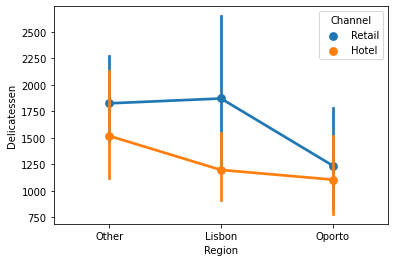

In [63]:
sns.pointplot(wcd.Region,wcd.Delicatessen,hue=wcd.Channel)

# On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [6]:
# Saving the values of decribe function into new dataframe.
ws3=wcd.describe().T
ws3

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


In [7]:
# Adding CV column in the new dataframe inorder to analyse the inconsistency
ws3["cv"]=ws3["std"]/ws3["mean"]
ws3
ws3.sort_values(by='cv')

,count,mean,std,min,25%,50%,75%,max,cv
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0,0.576695
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0,0.793240
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.053918
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.195174
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.273299
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.849407


# Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

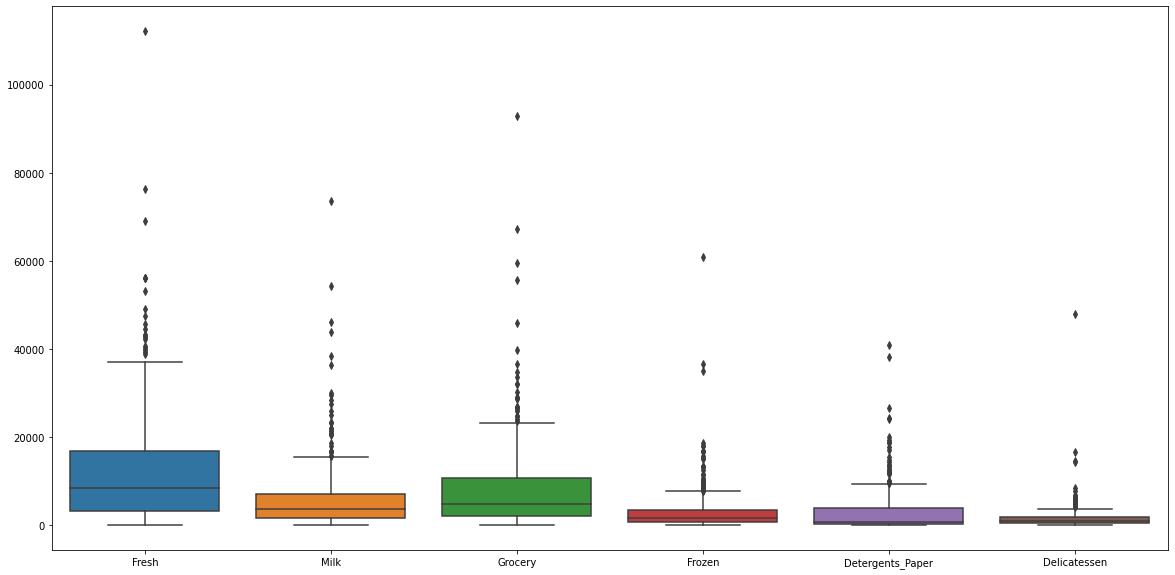

In [8]:
# Drawing Boxplots of all 6 varietis to know whether there are any outliers
wcd1= wcd.drop(['Total', 'Buyer/Spender','Channel','Region'], axis=1)
plt.figure(figsize=(20,10))
sns.boxplot(data=wcd1)

In [9]:
# From the above boxplot we can understand that there are outliers in each variety and no of outliers can be found as below
# Defining Q1, Q3 and IQR ranges for finding the number of outliers in each Variety.
Q1=wcd1.quantile(0.25)
Q3=wcd1.quantile(0.75)
IQR=Q3-Q1
((wcd1<(Q1-1.5*IQR))|(wcd1>(Q3+1.5*IQR))).sum()

Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicatessen        27
dtype: int64

# On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [10]:
from scipy.stats import variation

In [11]:
# Creating Pivot Table for CV of all items, Channel and Region wise. It will help us to analyse the spendings and suggesting the proper investment based on CV.
wcd.pivot_table(values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],index='Region',columns='Channel',aggfunc=st.variation)

Delicatessen           Detergents_Paper               Fresh            \
Channel        Hotel    Retail            Hotel    Retail     Hotel    Retail   
Region                                                                          
Lisbon      1.010366  0.844395         1.362187  0.651707  0.948436  1.012104   
Oporto      0.938370  0.836982         0.865205  0.959034  0.755994  0.917003   
Other       2.406988  1.154817         1.394922  0.868697  1.060061  0.975375   

           Frozen             Grocery                Milk            
Channel     Hotel    Retail     Hotel    Retail     Hotel    Retail  
Region                                                               
Lisbon   1.038772  0.911902  0.893848  0.547926  1.101167  0.595605  
Oporto   1.957877  1.562595  0.681008  0.836754  1.265113  0.700160  
Other    1.352192  0.989504  0.922363  0.767229  1.289886  0.958414

In [12]:
ws2=wcd.pivot_table(values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],index='Region',columns='Channel',aggfunc='mean')
ws2

Delicatessen              Detergents_Paper                      Fresh  \
Channel        Hotel       Retail            Hotel       Retail         Hotel   
Region                                                                          
Lisbon   1197.152542  1871.944444       950.525424  8225.277778  12902.254237   
Oporto   1105.892857  1239.000000       482.714286  8410.263158  11650.535714   
Other    1518.284360  1826.209524       786.682464  6899.238095  13878.052133   

                           Frozen                   Grocery                \
Channel       Retail        Hotel       Retail        Hotel        Retail   
Region                                                                      
Lisbon   5200.000000  3127.322034  2584.111111  4026.135593  18471.944444   
Oporto   7289.789474  5745.035714  1540.578947  4395.500000  16326.315789   
Other    9831.504762  3656.900474  1513.200000  3886.734597  15953.809524   

                Milk                
Channel        Hotel        Retail  
Region                              
Lisbon   3870.203390  10784.000000  
Oporto   2304.250000   9190.789474  
Other    3486.981043  10981.009524

# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

In [13]:
cmsu = pd.read_csv('Survey-1.csv')
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [14]:
#2.1.1. Gender and Major
pd.crosstab(cmsu['Gender'],cmsu['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [15]:
# 2.1.2. Gender and Grad Intention
pd.crosstab(cmsu['Gender'],cmsu['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [16]:
#2.1.3. Gender and Employment
pd.crosstab(cmsu['Gender'],cmsu['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [17]:
#2.1.4. Gender and Computer
pd.crosstab(cmsu['Gender'],cmsu['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [18]:
# 2.2.1. What is the probability that a randomly selected CMSU student will be male?
cmsu.value_counts('Gender')

Gender
Female    33
Male      29
dtype: int64

In [19]:
a=29/62
print(a, 'is the probability of a randomly selected CMSU student is male')

0.46774193548387094 is the probability of a randomly selected CMSU student is male


In [20]:
# 2.2.2. What is the probability that a randomly selected CMSU student will be female?
b = 33/62
print(b, 'is the probability of a randomly selected CMSU student is male')

0.532258064516129 is the probability of a randomly selected CMSU student is male


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [21]:
# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.
ac = 4/29
print(ac,'is the probability of randomly selected CMSU student is Majors in accounting given that student is male') 
cis = 1/29
print(cis,'is the probability of randomly selected CMSU student is Majors in CIS given that student is male')
ef = 4/29
print(ef,"is the probability of randomly selected CMSU student is Majors in Economics/Finance given that student is male")
ib = 2/29
print(ib,"is the probability of randomly selected CMSU student is Majors in International Business  given that student is male")
mgmt = 6/29
print(mgmt,"is the probability of randomly selected CMSU student is Majors in Management  given that student is male" )
ot = 4/29
print(ot, "is the probability of randomly selected CMSU student is Majors in Others  given that student is male")
retail = 5/29
print(retail, "is the probability of randomly selected CMSU student is Majors in Retail  given that student is male")
undecided = 3/29
print(undecided, "is the probability of randomly selected CMSU student is Majors in Undecided  given that student is male")

0.13793103448275862 is the probability of randomly selected CMSU student is Majors in accounting given that student is male
0.034482758620689655 is the probability of randomly selected CMSU student is Majors in CIS given that student is male
0.13793103448275862 is the probability of randomly selected CMSU student is Majors in Economics/Finance given that student is male
0.06896551724137931 is the probability of randomly selected CMSU student is Majors in International Business  given that student is male
0.20689655172413793 is the probability of randomly selected CMSU student is Majors in Management  given that student is male
0.13793103448275862 is the probability of randomly selected CMSU student is Majors in Others  given that student is male
0.1724137931034483 is the probability of randomly selected CMSU student is Majors in Retail  given that student is male
0.10344827586206896 is the probability of randomly selected CMSU student is Majors in Undecided  given that student is male


In [22]:
# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.
ac = 3/33
print(ac,'is the probability of randomly selected CMSU student is Majors in accounting given that student is female') 
cis = 3/33
print(cis,'is the probability of randomly selected CMSU student is Majors in CIS given that student is female')
ef = 7/33
print(ef,"is the probability of randomly selected CMSU student is Majors in Economics/Finance given that student is female")
ib = 4/33
print(ib,"is the probability of randomly selected CMSU student is Majors in International Business  given that student is female")
mgmt = 4/33
print(mgmt,"is the probability of randomly selected CMSU student is Majors in Management  given that student is female" )
ot = 3/33
print(ot, "is the probability of randomly selected CMSU student is Majors in Others  given that student is female")
retail = 9/33
print(retail, "is the probability of randomly selected CMSU student is Majors in Retail  given that student is female")
undecided = 0/33
print(undecided, "is the probability of randomly selected CMSU student is Majors in Undecided  given that student is female")

0.09090909090909091 is the probability of randomly selected CMSU student is Majors in accounting given that student is female
0.09090909090909091 is the probability of randomly selected CMSU student is Majors in CIS given that student is female
0.21212121212121213 is the probability of randomly selected CMSU student is Majors in Economics/Finance given that student is female
0.12121212121212122 is the probability of randomly selected CMSU student is Majors in International Business  given that student is female
0.12121212121212122 is the probability of randomly selected CMSU student is Majors in Management  given that student is female
0.09090909090909091 is the probability of randomly selected CMSU student is Majors in Others  given that student is female
0.2727272727272727 is the probability of randomly selected CMSU student is Majors in Retail  given that student is female
0.0 is the probability of randomly selected CMSU student is Majors in Undecided  given that student is female


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [23]:
# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
print(17/62, '     is Probability of a randomly chosen student is a male and intends to graduate')

0.27419354838709675      is Probability of a randomly chosen student is a male and intends to graduate


In [24]:
# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.
print(4/62, '     is probability of a randomly selected student is a female and does NOT have a laptop')

0.06451612903225806      is probability of a randomly selected student is a female and does NOT have a laptop


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [25]:
# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?
print(29/62 + 10/62 - 7/62,    'is the probability that a randomly chosen student is a male or has full-time employment')

0.5161290322580645 is the probability that a randomly chosen student is a male or has full-time employment


In [26]:
# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
print(4/33+4/33, 'is the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.')

0.24242424242424243 is the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.


# 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [27]:
GIG = pd.crosstab(cmsu['Gender'],cmsu['Grad Intention'])
GIG.drop('Undecided',axis = 1, inplace = True)
GIG

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [28]:
chi2, pval, dof, exp_freq = chi2_contingency(GIG,correction = False)
print(chi2)
print(pval)

4.285714285714286
0.03843393023678176


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

In [29]:
# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
len(cmsu[(cmsu['GPA']<3)])/len(cmsu[(cmsu['Gender']=='Male')|(cmsu['Gender']=='Female')])

0.27419354838709675

In [30]:
# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.
print('The conditional probability that a randomly selected male earns 50 or more is ', len(cmsu[(cmsu['Gender']=='Male')&(cmsu['Salary']>=50)])/len(cmsu[cmsu['Gender']=='Male']))
print('The conditional probability that a randomly selected female earns 50 or more is ', len(cmsu[(cmsu['Gender']=='Female')&(cmsu['Salary']>=50)])/len(cmsu[cmsu['Gender']=='Female']))

The conditional probability that a randomly selected male earns 50 or more is  0.4827586206896552
The conditional probability that a randomly selected female earns 50 or more is  0.5454545454545454


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [31]:
cmsu.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


<AxesSubplot:xlabel='GPA'>

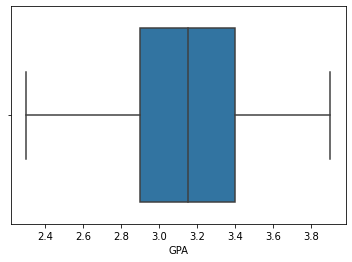

In [32]:
sns.boxplot(cmsu['GPA'])

<AxesSubplot:xlabel='Salary'>

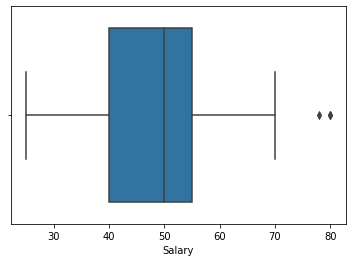

In [33]:
sns.boxplot(cmsu['Salary'])

<AxesSubplot:xlabel='Spending'>

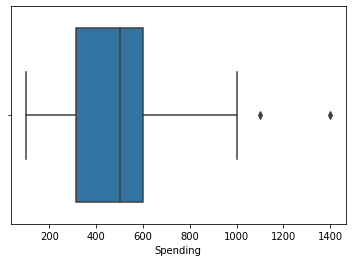

In [34]:
sns.boxplot(cmsu['Spending'])

<AxesSubplot:xlabel='Text Messages'>

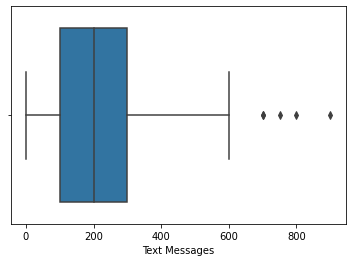

In [35]:
sns.boxplot(cmsu['Text Messages'])

# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [36]:
shingles = pd.read_csv('A+&+B+shingles.csv')
shingles

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [37]:
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import variation
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chi2_contingency;

In [38]:
tA,pA=stats.ttest_1samp(shingles.A,0.35)
print(tA)
print(pA/2)

-1.4735046253382782
0.07477633144907513


In [39]:
TB,PB=stats.ttest_1samp(shingles.B,0.35,nan_policy='omit')
print(TB)
print(PB/2)

-3.1003313069986995
0.0020904774003191826


# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [40]:
print('The Variance of shingles A is', shingles.A.var())
print('The Variance of shingles B is',shingles.B.var())

The Variance of shingles A is 0.018422857142857133
The Variance of shingles B is 0.018850322580645163


In [41]:
# H0:Mean of moisture content in Sample A is equal to Mean of moisture in Sample B 
# H1:Mean of moisture content in Sample A is not equal to Mean of moisture in Sample B
sh_tB,sh_pB=stats.ttest_ind(shingles.A,shingles.B,nan_policy='omit')
print(sh_tB)
print(sh_pB)

1.2896282719661123
0.2017496571835306
